In [1]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 512
np.random.seed(seed)

AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  E 		  I
-------------------------------------
| 779 		 0.03 		 0.38 |
| 3629 		 0.08 		 0.0 |
| 2201 		 0.01 		 0.12 |
| 2004 		 0.16 		 0.29 |
| 852 		 0.11 		 0.35 |
| 1196 		 0.11 		 0.22 |
| 3282 		 0.35 		 0.16 |
| 1592 		 0.41 		 0.34 |
| 4650 		 0.17 		 0.15 |
| 2437 		 0.02 		 0.09 |
| 592 		 0.52 		 0.23 |
| 120 		 0.29 		 0.18 |
| 2626 		 0.12 		 0.06 |
| 1928 		 0.24 		 0.33 |
| 1482 		 0.01 		 0.17 |
| 1857 		 0.08 		 0.09 |
| 306 		 0.05 		 0.25 |
| 1309 		 0.14 		 0.32 |
| 1095 		 0.28 		 0.2 |
-------------------------------------
The s.d. of M is: 1178.0
The s.d. of E is: 0.14
The s.d. of I is: 0.14
-------------------------------------
The mean of M is: 1925
The mean of E is: 0.21
The mean of I is: 0.2
-------------------------------------


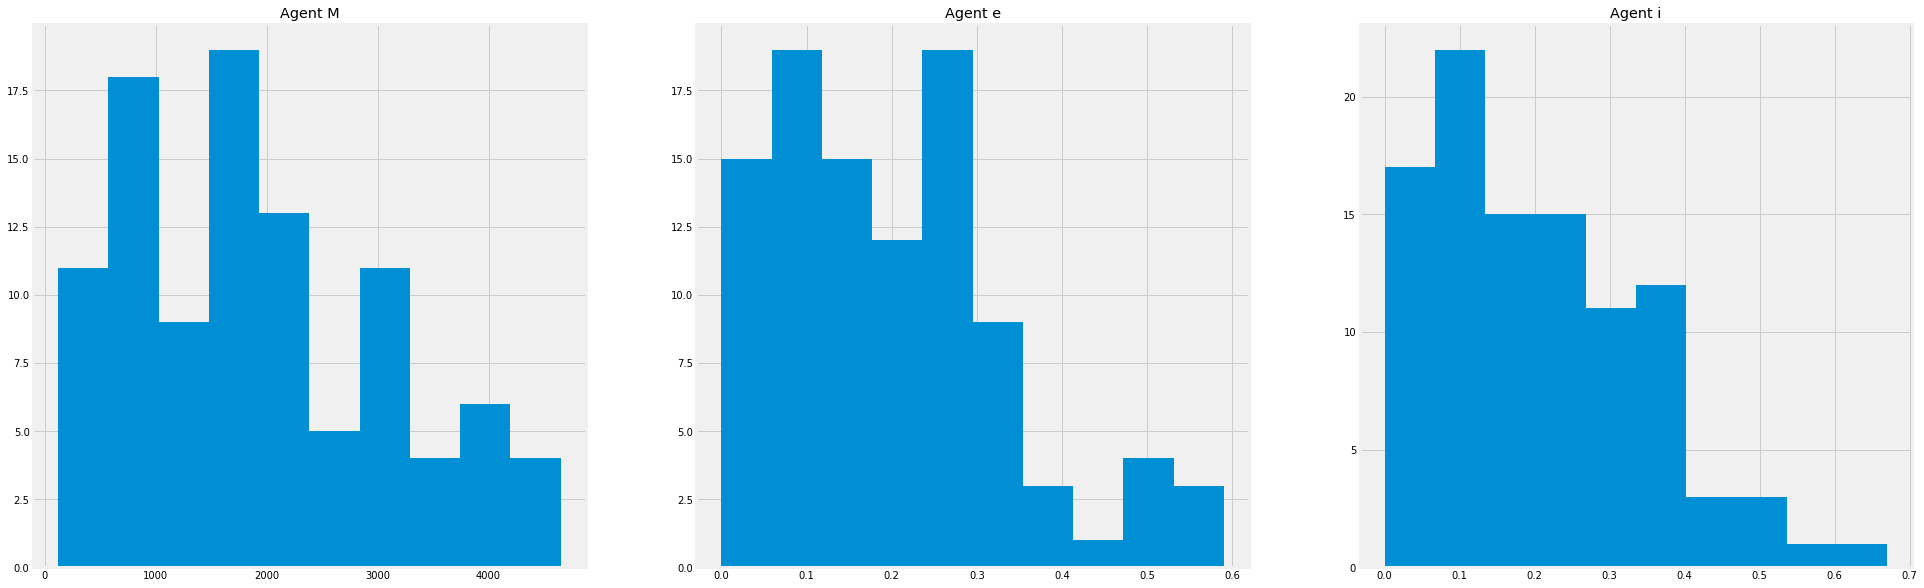

____________________________________________________________________________________________________
Agent 0 playing Agent 1: Reward: -1.0, Temptation: 109.0, Sucker: -110.0, Punishment: 0
Agent 1 playing Agent 0: Reward: 62.0, Temptation: 62.0, Sucker: -0.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 2: Reward: 58.0, Temptation: 66.0, Sucker: -8.0, Punishment: 0
Agent 2 playing Agent 0: Reward: 5.0, Temptation: 8.0, Sucker: -3.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 3: Reward: -62.0, Temptation: 60.0, Sucker: -122.0, Punishment: 0
Agent 3 playing Agent 0: Reward: 118.0, Temptation: 125.0, Sucker:

In [2]:
# first number is median, second standard deviation
M = [1000, 2000]
E = [0.1, 0.2]
I = [0.1, 0.2]

# create a list of agents, default = 100
agents = get_agents(homogenous = False, number_of_agents = 100, M = M, E = E, I = I)
check_parameters(agents)
compare_payoff_function(agents, default_payoff_functions)

Tournament has started...
Tournament has ended. The simulation took 18 minutes.
    S.D.  Counts
0    0.5     249
1    0.6     213
2    0.7     199
3    0.8     164
4    0.9     160
5    1.0     149
6    1.1     123
7    1.2     121
8    1.3      99
9    1.4     105
10   1.5      87
11   1.6      63
12   1.7      46
13   1.8      38
14   1.9      31
15   2.0      33
16   2.1      18
17   2.2      22
18   2.3      20
19   2.4      20
20   2.5       9
21   2.6       3
22   2.7       3
23   2.8       3
24   2.9       2
25   3.0       0


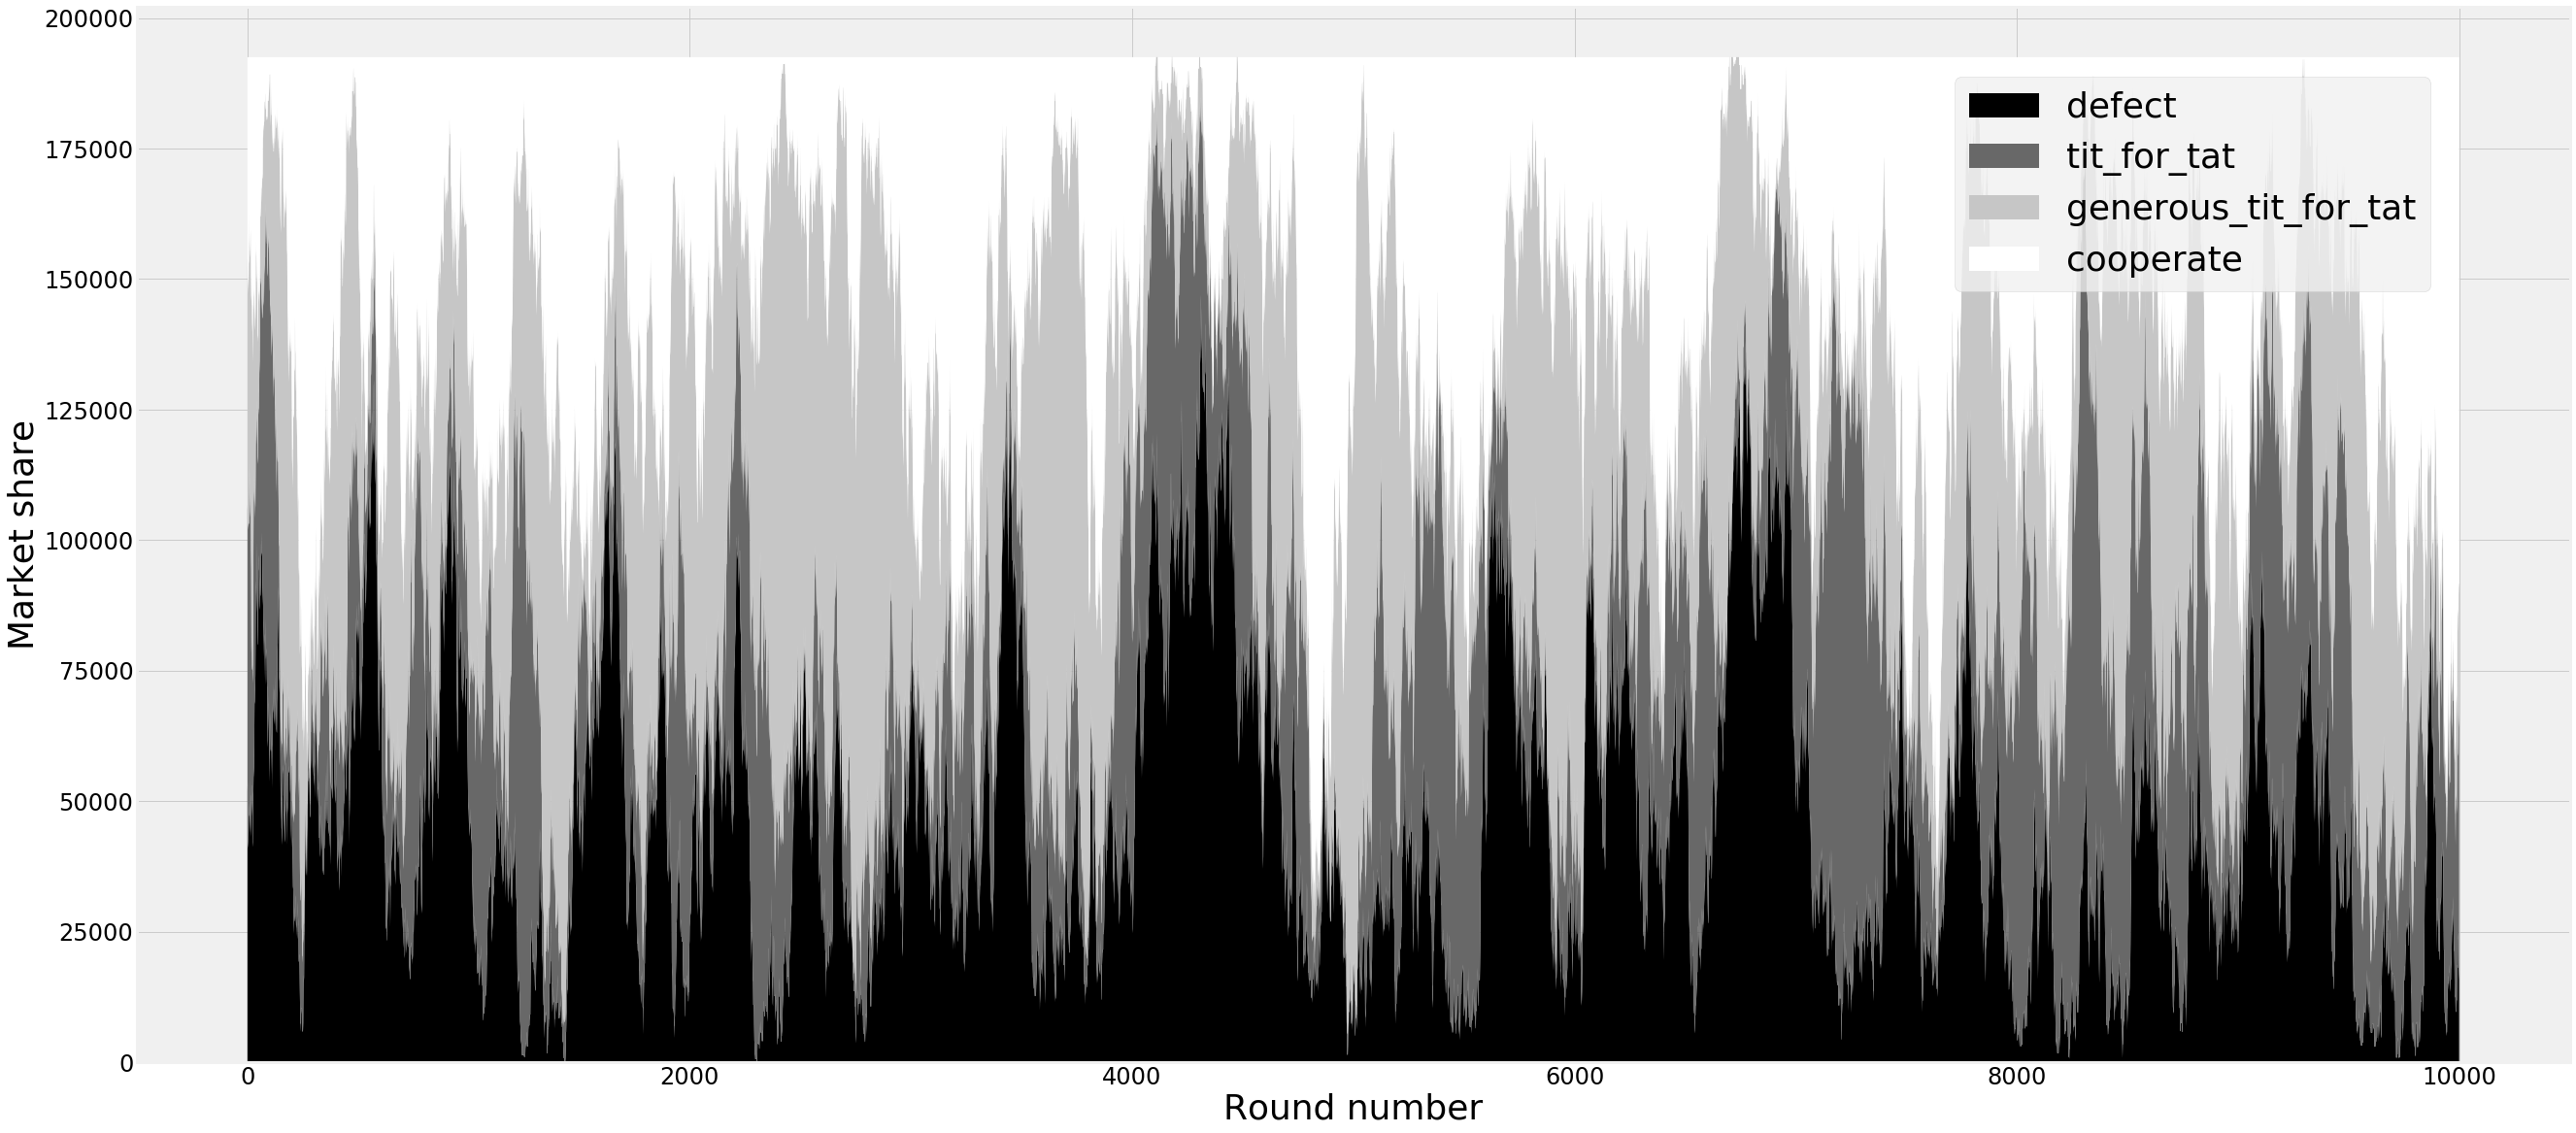

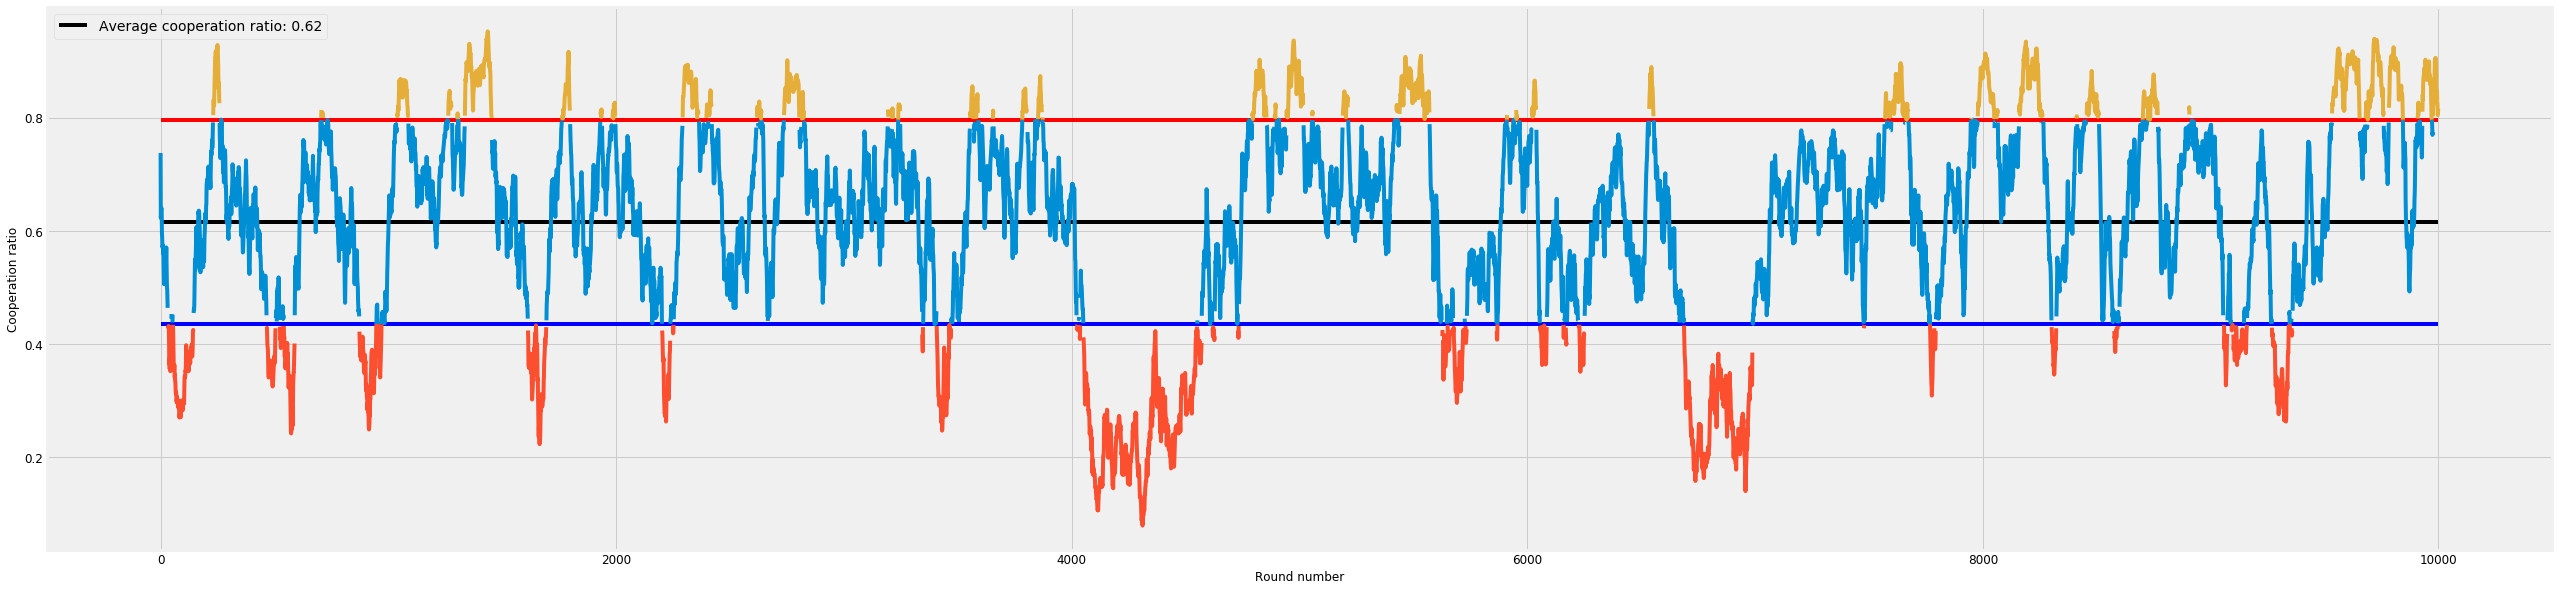

In [3]:
tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 10,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )
draw_stack(tour)
C_D_ratios_per_round_var(tour, constant = 1)
outliers = count_outliers(tour, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values())}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("Data/data_" + str(seed) + "_outliercounts.csv", encoding='utf-8', index = False, float_format='%.1f')
save_tournament_csv(tour, type_of_tournament= "complete_heterogeneity", seed = str(seed))